In [1]:
from math import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

matplotlib.rcParams['axes.labelsize'] = 15

variables = [r"$\dot R$ [m/s]", r"$R$ [m]", r"$Temp$ [K]"]

def plotsol(t,y):
    fig, ax = plt.subplots(len(y), 1, sharex= True, figsize = (8,5), dpi = 150, tight_layout = True)
    
    for i in range(len(y)):
        ax[i].plot(t, y[i])
        ax[i].set_ylabel(variables[i])
    ax[-1].set_xlabel("$t$ [s]")

    # ax[1].set_ylim(bottom = 0)
    #ax[0].set(xlim = (t[0], t[-1]))
    

In [ ]:
patm        = 98000     # Pascals
T_amb       = 293       # Kelvin
# nR          = 800e-8   # n (moles) * R (cte gases)
N           = 6e12      # Num Particulas
kb          = 1.38e-23  # J/K

A           = 2
w           = 2*np.pi * 1

rho_agua    = 1000      # kg/m^3
viscosidad  = 0.001      # Pa*s == kg/s
s_sup       = 7e-2  # N/m

In [3]:
def ps(t, w, d = 0):
    return A * sin(t*w + d)   

In [4]:
# def fun(t,y):
#     vel, radi, temp = y
#     vDot =  -3/2 * vel*vel/radi + (
#             3/4 * nR * temp / (pi*np.power(radi,3))
#             - (2*s_sup + 4*viscosidad*vel)/radi
#             - patm #- ps(t, w)
#         ) /rho_agua
#     rDot = vel
#     tDot = - 2 * nR * temp * vel/(kb * radi)

#     return vDot,rDot,tDot  

In [5]:
def fun(t,y):
    vel, radi, temp = y
    vDot = (
                - 3/2 * np.power(vel,2)
                + (
                    3/4 * N*kb*temp/(np.pi*np.power(radi,3))
                    - (2*s_sup+4*viscosidad*vel)/radi
                    - patm
                    #- ps(t,w)
                )/rho_agua
            )/radi
    rDot = vel
    tDot = - 2 * temp * vel/radi

    return vDot,rDot,tDot  

The solver successfully reached the end of the integration interval.


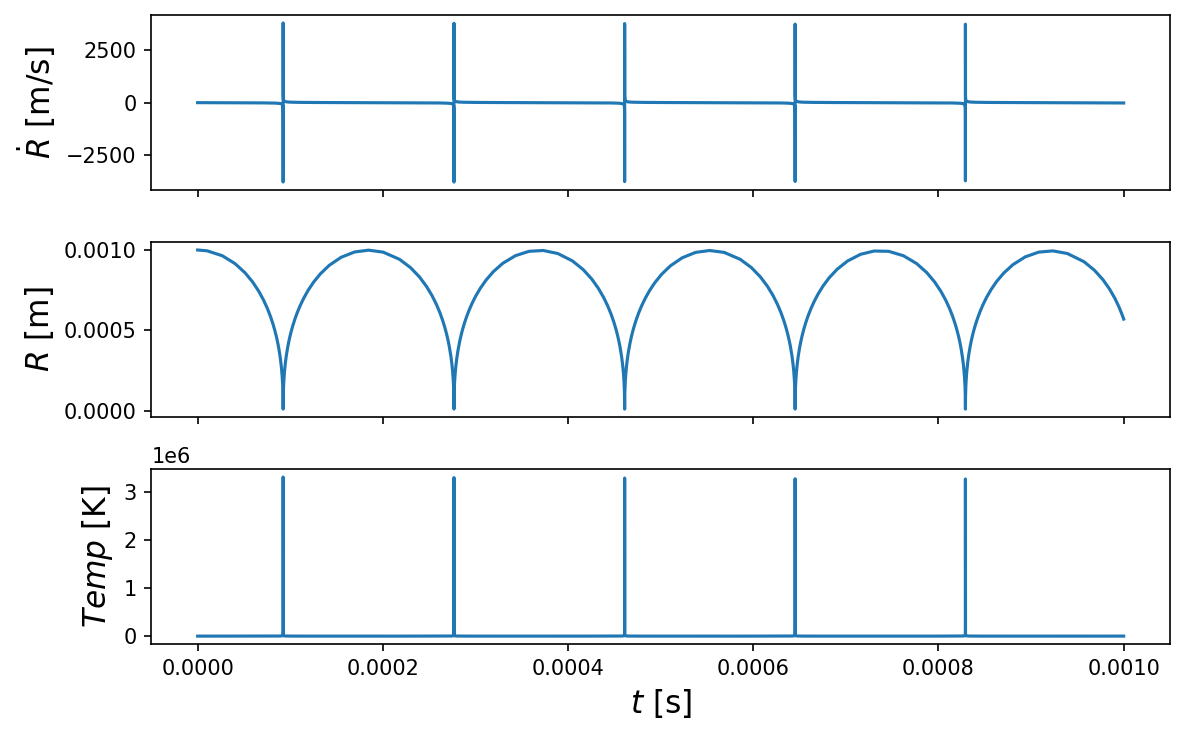

In [6]:
y0 = [0, 10e-4, T_amb] # m/s , m, Kelvin
sol = solve_ivp(fun, (0., .001), y0, max_step = 1e-4, rtol = 1e-6)
print(sol.message)
plotsol(sol.t,sol.y)